In [1]:
import numpy as np
import torch
from mcspace.data_utils import get_data, get_mouse_diet_perturbations_dataset, get_human_timeseries_dataset
from mcspace.utils import get_device, pickle_load, pickle_save, get_summary_results, MODEL_FILE, DATA_FILE
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from mcspace.dataset import DataSet
import pandas as pd

# Paths

In [6]:
rootpath = Path("../../")
datapath = rootpath / "paper" / "datasets"

In [4]:
basepath = Path("./")
outpath = basepath / "supplemental_figures"
outpath.mkdir(exist_ok=True, parents=True)

# Human dataset filtering

### Abundance threshold

In [7]:
abun_thres_vals = [0.0001,0.0005,0.001,0.0025,0.005,0.01,0.025,0.05]

human_notu_vals = np.zeros(len(abun_thres_vals))

for i,min_abundance in enumerate(abun_thres_vals):
    min_reads = 100
    max_reads=10000

    reads, num_otus, times, subjects, dataset = get_human_timeseries_dataset(
        min_abundance=min_abundance, min_reads=min_reads, max_reads=max_reads, rootpath=datapath)
    human_notu_vals[i] = num_otus

c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads)
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads)
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads)
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read

Text(0.5, 0, 'Abundance threshold')

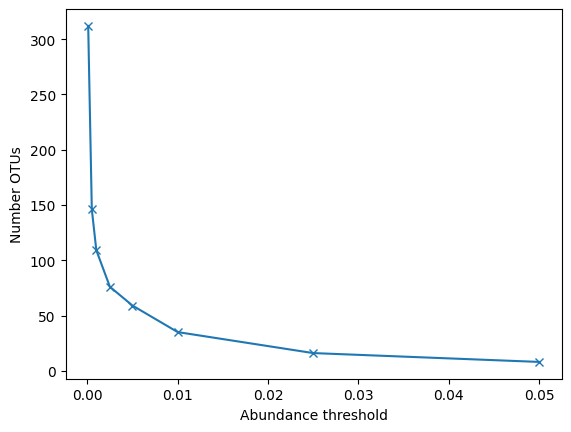

In [8]:
fig, ax = plt.subplots()
ax.plot(abun_thres_vals,human_notu_vals,'-x')
ax.set_ylabel("Number OTUs")
ax.set_xlabel("Abundance threshold")

### Read threshold

In [9]:
def get_num_particles(reads, times, subjects):
    npart = 0
    for t in times:
        for s in subjects:
            npart += reads[t][s].shape[0]
    return npart

In [11]:
min_read_vals=[10,25,50,100,250,500,1000,2500]

human_npart_vals = np.zeros(len(min_read_vals))

for i,min_reads in enumerate(min_read_vals):
    max_reads=10000
    min_abundance=0.005 # from inspecting above plot
    num_consistent_subjects=1
    
    reads, num_otus, times, subjects, dataset = get_human_timeseries_dataset(
        min_abundance=min_abundance, min_reads=min_reads, max_reads=max_reads, rootpath=datapath)
    num_particles = get_num_particles(reads, times, subjects)
    human_npart_vals[i] = num_particles

c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads)
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads)
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads)
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read

Text(0.5, 0, 'Min number of reads')

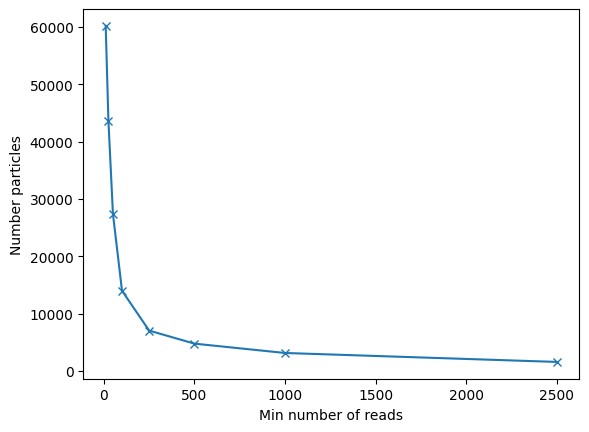

In [12]:
fig, ax = plt.subplots()
ax.plot(min_read_vals,human_npart_vals,'-x')
ax.set_ylabel("Number particles")
ax.set_xlabel("Min number of reads")

### Final filtering criteria

In [13]:
# from looking at plots and estimating an elbow
min_abundance=0.005
min_reads=250
max_reads = 10000

In [14]:
reads, num_otus, times, subjects, human_dataset = get_human_timeseries_dataset(
    min_abundance=min_abundance, min_reads=min_reads, max_reads=max_reads, rootpath=datapath)

c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads)


# Mouse dataset filtering

### Abundance threshold

In [15]:
abun_thres_vals = [0.0001,0.0005,0.001,0.0025,0.005,0.01,0.025,0.05]

mouse_notu_vals = np.zeros(len(abun_thres_vals))

for i,min_abundance in enumerate(abun_thres_vals):
    min_reads = 100
    max_reads=10000

    reads, num_otus, times, subjects, dataset = get_mouse_diet_perturbations_dataset(
        min_abundance=min_abundance, min_reads=min_reads, max_reads=max_reads, rootpath=datapath)
    mouse_notu_vals[i] = num_otus

c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads, compression='gzip')
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads, compression='gzip')
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads, compression='gzip')
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on imp

Text(0.5, 0, 'Abundance threshold')

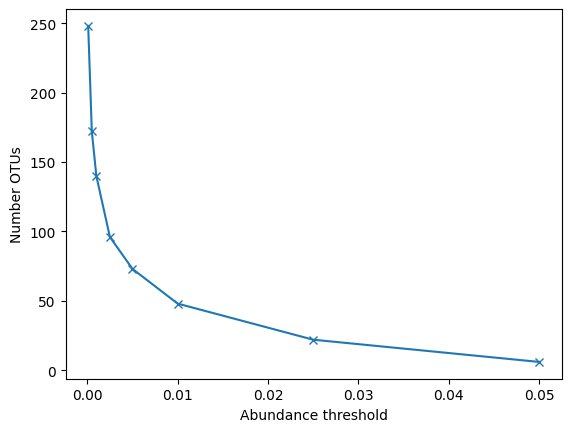

In [16]:
fig, ax = plt.subplots()
ax.plot(abun_thres_vals,mouse_notu_vals,'-x')
ax.set_ylabel("Number OTUs")
ax.set_xlabel("Abundance threshold")

### Read threshold

In [17]:
min_read_vals=[10,25,50,100,250,500,1000,2500]

mouse_npart_vals = np.zeros(len(min_read_vals))

for i,min_reads in enumerate(min_read_vals):
    max_reads=10000
    min_abundance=0.005 # from inspecting above plot
    num_consistent_subjects=1
    
    reads, num_otus, times, subjects, dataset = get_mouse_diet_perturbations_dataset(
        min_abundance=min_abundance, min_reads=min_reads, max_reads=max_reads, rootpath=datapath)
    num_particles = get_num_particles(reads, times, subjects)
    mouse_npart_vals[i] = num_particles

c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads, compression='gzip')
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads, compression='gzip')
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads, compression='gzip')
c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on imp

Text(0.5, 0, 'Min number of reads')

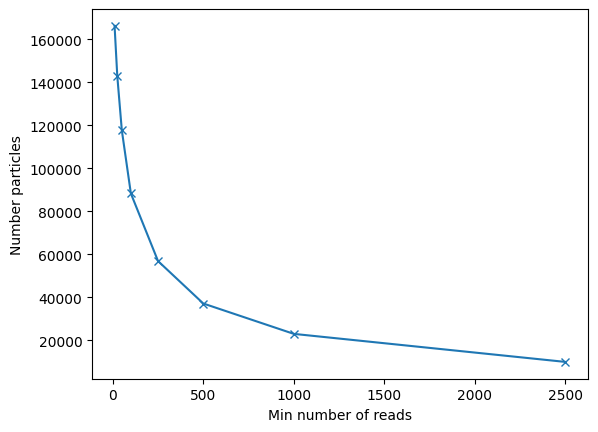

In [18]:
fig, ax = plt.subplots()
ax.plot(min_read_vals,mouse_npart_vals,'-x')
ax.set_ylabel("Number particles")
ax.set_xlabel("Min number of reads")

### Final filtering criteria

In [19]:
# from looking at plots and estimating an elbow
min_abundance=0.005
min_reads=250
max_reads = 10000

In [21]:
reads, num_otus, times, subjects, mouse_dataset = get_mouse_diet_perturbations_dataset(
    min_abundance=min_abundance, min_reads=min_reads, max_reads=max_reads, rootpath=datapath)

c:\users\gary\partners healthcare dropbox\gurdip uppal\research_bwh\mcspace_final\mcspace\mcspace\dataset.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  self._long_data = pd.read_csv(reads, compression='gzip')


# Render figure

In [25]:
from matplotlib import ticker

In [26]:
label_x = -0.23
label_y = 1.05
label_fontsize=14

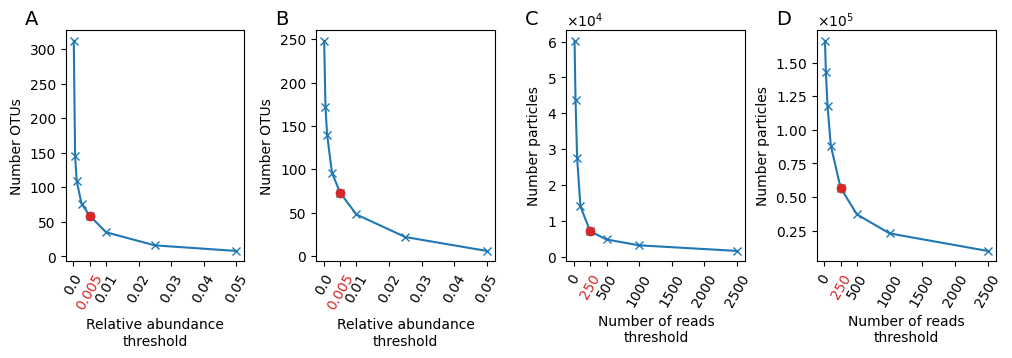

In [27]:
scale=1.5
rotation = 60

fig, ax = plt.subplots(figsize=(8*scale,2*scale), nrows=1, ncols=4)

abun_ticks = [0.0, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05]
part_ticks = [0, 250, 500, 1000, 1500, 2000, 2500]

# Human data
ax[0].plot(abun_thres_vals, human_notu_vals, '-x')
ax[0].plot(abun_thres_vals[4], human_notu_vals[4], 'o', color='tab:red')
ax[0].set_ylabel("Number OTUs")
ax[0].set_xlabel("Relative abundance\nthreshold")
ax[0].set_xticks(abun_ticks)
ax[0].set_xticklabels(abun_ticks, rotation=rotation)
plt.setp(ax[0].get_xticklabels()[1], color='tab:red')
# ax[0,0].set_title("Human")
ax[0].text(label_x, label_y, 'A', horizontalalignment='left',verticalalignment='center', 
             transform=ax[0].transAxes, fontsize=label_fontsize)

# Mouse data
ax[1].plot(abun_thres_vals, mouse_notu_vals, '-x')
ax[1].plot(abun_thres_vals[4], mouse_notu_vals[4], 'o', color='tab:red')
ax[1].set_xticks(abun_ticks)
ax[1].set_xticklabels(abun_ticks, rotation=rotation)
plt.setp(ax[1].get_xticklabels()[1], color='tab:red')
ax[1].set_ylabel("Number OTUs")
ax[1].set_xlabel("Relative abundance\nthreshold")
# ax[1,0].set_title("Mouse")
ax[1].text(label_x, label_y, 'B', horizontalalignment='left',verticalalignment='center', 
             transform=ax[1].transAxes, fontsize=label_fontsize)

# human data
ax[2].plot(min_read_vals, human_npart_vals, '-x')
ax[2].plot(min_read_vals[4], human_npart_vals[4], 'o', color='tab:red')
ax[2].set_xticks(part_ticks)
ax[2].set_xticklabels(part_ticks, rotation=rotation)
plt.setp(ax[2].get_xticklabels()[1], color='tab:red')
ax[2].set_ylabel("Number particles")
ax[2].set_xlabel("Number of reads\nthreshold")
ax[2].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax[2].text(label_x, label_y, 'C', horizontalalignment='left',verticalalignment='center', 
             transform=ax[2].transAxes, fontsize=label_fontsize)
ax[2].ticklabel_format(axis='y', style='sci', scilimits=(0, 2))

# mouse data
ax[3].plot(min_read_vals, mouse_npart_vals, '-x')
ax[3].plot(min_read_vals[4], mouse_npart_vals[4], 'o', color='tab:red')
ax[3].set_xticks(part_ticks)
ax[3].set_xticklabels(part_ticks, rotation=rotation)
plt.setp(ax[3].get_xticklabels()[1], color='tab:red')
ax[3].set_ylabel("Number particles")
ax[3].set_xlabel("Number of reads\nthreshold")
ax[3].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax[3].text(label_x, label_y, 'D', horizontalalignment='left',verticalalignment='center', 
             transform=ax[3].transAxes, fontsize=label_fontsize)
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 2))
plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.savefig(outpath / "filtering_thresholds.svg", bbox_inches="tight")